# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


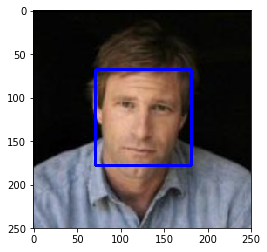

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

**Answer:**

The percentage of the first 100 images in `human_files` have a detected human face (using cascade file haarcascades/haarcascade_frontalface_alt.xml) is 96.0%.

The percentage of the first 100 images in `dog_files` have a detected human face (using cascade file haarcascades/haarcascade_frontalface_alt.xml) is 18.0%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
n_human_in_human = 0
n_human_in_dog = 0

for img in human_files_short:
    n_human_in_human += int(face_detector(img))
print("The percentage of the first 100 images in 'human_files' have a detected human face (using cascade file {}) is {}%.".format('haarcascades/haarcascade_frontalface_alt.xml', n_human_in_human / human_files_short.shape[0] * 100))

for img in dog_files_short:
    n_human_in_dog += int(face_detector(img))
print("The percentage of the first 100 images in 'dog_files' have a detected human face (using cascade file {}) is {}%.".format('haarcascades/haarcascade_frontalface_alt.xml', n_human_in_dog / dog_files_short.shape[0] * 100))

The percentage of the first 100 images in 'human_files' have a detected human face (using cascade file haarcascades/haarcascade_frontalface_alt.xml) is 96.0%.
The percentage of the first 100 images in 'dog_files' have a detected human face (using cascade file haarcascades/haarcascade_frontalface_alt.xml) is 18.0%.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.
def face_detector_with_cascade(img_path, cascade_path='haarcascades/haarcascade_frontalface_alt.xml'):
    # extract pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cascade_path)
    # load color (BGR) image
    img = cv2.imread(img_path)
    # convert BGR image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find faces in image
    faces = face_cascade.detectMultiScale(img_gray)
    return len(faces) > 0

In [6]:
# test the performance of face_detector_with_cascade
cascade_path = 'lbpcascades/lbpcascade_frontalface_improved.xml'

n_human_in_human = 0
n_human_in_dog = 0

for img in human_files_short:
    n_human_in_human += int(face_detector_with_cascade(img, cascade_path))
print("The percentage of the first 100 images in 'human_files' have a detected human face (using cascade file {}) is {}%.".format(cascade_path, n_human_in_human / human_files_short.shape[0] * 100))

for img in dog_files_short:
    n_human_in_dog += int(face_detector_with_cascade(img, cascade_path))
print("The percentage of the first 100 images in 'dog_files' have a detected human face (using cascade file {}) is {}%.".format(cascade_path, n_human_in_dog / dog_files_short.shape[0] * 100))

The percentage of the first 100 images in 'human_files' have a detected human face (using cascade file lbpcascades/lbpcascade_frontalface_improved.xml) is 84.0%.
The percentage of the first 100 images in 'dog_files' have a detected human face (using cascade file lbpcascades/lbpcascade_frontalface_improved.xml) is 4.0%.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models
from torchsummary import summary
print("PyTorch Version:", torch.__version__)

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print('Is CUDA available:', use_cuda)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    
summary(VGG16, (3, 224, 224))

PyTorch Version: 1.1.0
Is CUDA available: True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch.nn.functional as F

def model_predict(model, img_path):
    '''
    Use pre-trained PyTorch model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        model: trained PyTorch model
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img_transform = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])
                                       ])
    
    img = Image.open(img_path).convert("RGB")
    img_tensor = img_transform(img).unsqueeze(0)  # add the batch dimension
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    model.eval()
    output = model(img_tensor)
    output_softmax = F.softmax(output)
    output_softmax = output_softmax.cpu().data.numpy().squeeze()
    
    return np.argmax(output_softmax)  # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(model, img_path):
    ## TODO: Complete the function.
    prediction = model_predict(model, img_path)
    return ((prediction <= 268) & (prediction >= 151))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

**Answer:**

The percentage of the images in `human_files_short` have a detected dog (using pre-trained VGG16 model) is 0.0%.

The percentage of the images in `dog_files_short` have a detected dog (using pre-trained VGG16 model) is 94.0%.

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
n_dog_in_human = 0
n_dog_in_dog = 0

for img in human_files_short:
    n_dog_in_human += int(dog_detector(VGG16, img))
print("The percentage of the images in 'human_files_short' have a detected dog (using pre-trained VGG16 model) is {}%.".format(n_dog_in_human / human_files_short.shape[0] * 100))

for img in dog_files_short:
    n_dog_in_dog += int(dog_detector(VGG16, img))
print("The percentage of the images in 'dog_files_short' have a detected dog (using pre-trained VGG16 model) is {}%.".format(n_dog_in_dog / dog_files_short.shape[0] * 100))

C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


The percentage of the images in 'human_files_short' have a detected dog (using pre-trained VGG16 model) is 0.0%.
The percentage of the images in 'dog_files_short' have a detected dog (using pre-trained VGG16 model) is 94.0%.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define ResNet50 model
ResNet50 = models.resnet50(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    ResNet50 = ResNet50.cuda()
    
summary(ResNet50, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

     BatchNorm2d-125          [-1, 256, 14, 14]             512
            ReLU-126          [-1, 256, 14, 14]               0
          Conv2d-127         [-1, 1024, 14, 14]         262,144
     BatchNorm2d-128         [-1, 1024, 14, 14]           2,048
            ReLU-129         [-1, 1024, 14, 14]               0
      Bottleneck-130         [-1, 1024, 14, 14]               0
          Conv2d-131          [-1, 256, 14, 14]         262,144
     BatchNorm2d-132          [-1, 256, 14, 14]             512
            ReLU-133          [-1, 256, 14, 14]               0
          Conv2d-134          [-1, 256, 14, 14]         589,824
     BatchNorm2d-135          [-1, 256, 14, 14]             512
            ReLU-136          [-1, 256, 14, 14]               0
          Conv2d-137         [-1, 1024, 14, 14]         262,144
     BatchNorm2d-138         [-1, 1024, 14, 14]           2,048
            ReLU-139         [-1, 1024, 14, 14]               0
      Bottleneck-140         [-1, 1024, 

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
n_dog_in_human = 0
n_dog_in_dog = 0

for img in human_files_short:
    n_dog_in_human += int(dog_detector(ResNet50, img))
print("The percentage of the images in 'human_files_short' have a detected dog (using pre-trained ResNet50 model) is {}%.".format(n_dog_in_human / human_files_short.shape[0] * 100))

for img in dog_files_short:
    n_dog_in_dog += int(dog_detector(ResNet50, img))
print("The percentage of the images in 'dog_files_short' have a detected dog (using pre-trained ResNet50 model) is {}%.".format(n_dog_in_dog / dog_files_short.shape[0] * 100))

C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


The percentage of the images in 'human_files_short' have a detected dog (using pre-trained ResNet50 model) is 0.0%.
The percentage of the images in 'dog_files_short' have a detected dog (using pre-trained ResNet50 model) is 95.0%.


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import os
from sklearn.datasets import load_files
# from torchvision import datasets  # datasets.ImageFolder can also be used to generate PyTorch Dataset
from torch.utils.data import Dataset, DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

class DogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = os.path.normpath(root_dir)
        self.transform = transform
        all_img_data = load_files(root_dir)
        self.all_img_path = all_img_data['filenames']
        self.all_img_target = all_img_data['target']
        self.classes = all_img_data['target_names']
    
    def __len__(self):
        return len(self.all_img_path)
    
    def __getitem__(self, idx):
        img_path = self.all_img_path[idx]
        img_target = self.all_img_target[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        img_target = torch.from_numpy(np.array(img_target)).long()
        return img, img_target

In [14]:
img_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])
                                   ])
dog_dataset = {}
dog_dataset['train'] = DogDataset("dogImages/train", img_transform)
dog_dataset['valid'] = DogDataset("dogImages/valid", img_transform)
dog_dataset['test'] = DogDataset("dogImages/test", img_transform)

In [15]:
n_classes = len(dog_dataset['train'].classes)

In [16]:
print("Number of training samples:", len(dog_dataset['train']))
print("Number of validation samples:", len(dog_dataset['valid']))
print("Number of testing samples:", len(dog_dataset['test']))
print("Number of dog classes:", n_classes)

Number of training samples: 6680
Number of validation samples: 835
Number of testing samples: 836
Number of dog classes: 133


In [17]:
batch_size = 64

loaders_scratch = {}
loaders_scratch['train'] = DataLoader(dog_dataset['train'], batch_size=batch_size, shuffle=True, num_workers=0)
loaders_scratch['valid'] = DataLoader(dog_dataset['valid'], batch_size=batch_size, shuffle=True, num_workers=0)
loaders_scratch['test'] = DataLoader(dog_dataset['test'], batch_size=batch_size, shuffle=True, num_workers=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer:**

I firstly resized the image by resizing it to 256 * 256, and then cropping a size of 224 * 224 from the center. The reason I chose 224 * 224 as the input tensor size is that a squared shape would be better for sequential CNN operations, and it is required to have such input tensor size for the pre-trained models like VGG16, ResNet50, etc.

No, I did not decide to augment the dataset because I think the size of training dataset (6680) would be sufficient. But it would always be a good idea to augment the training dataset for better performances.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, n_classes):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1)
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
        self.bn2 = nn.BatchNorm2d(num_features=32)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1)
        
        self.linear1 = nn.Linear(in_features=256, out_features=512)
        self.dropout = nn.Dropout(p=0.5)
        self.linear2 = nn.Linear(in_features=512, out_features=n_classes)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = F.adaptive_avg_pool2d(x, (1, 1))  # global average pooling
        x = x.view(x.shape[:2])  # squeeze the shape of (1, 1) at the last two dimensions
        # x = x.view(x.shape[0], -1)  # flatten
        x = self.dropout(F.relu(self.linear1(x)))
        x = self.linear2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(n_classes)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

In [19]:
summary(model_scratch, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 220, 220]           1,216
       BatchNorm2d-2         [-1, 16, 220, 220]              32
         MaxPool2d-3         [-1, 16, 110, 110]               0
            Conv2d-4         [-1, 32, 106, 106]          12,832
       BatchNorm2d-5         [-1, 32, 106, 106]              64
         MaxPool2d-6           [-1, 32, 53, 53]               0
            Conv2d-7           [-1, 64, 51, 51]          18,496
         MaxPool2d-8           [-1, 64, 25, 25]               0
            Conv2d-9          [-1, 128, 23, 23]          73,856
        MaxPool2d-10          [-1, 128, 11, 11]               0
           Conv2d-11            [-1, 256, 9, 9]         295,168
        MaxPool2d-12            [-1, 256, 4, 4]               0
           Linear-13                  [-1, 512]         131,584
          Dropout-14                  [

**Answer:**

My deep neural network consists of a few combinations of Conv2D layers, BatchNorm2d layers, ReLU activation functions, and MaxPooling2D layers for multiscale feature extraction, and then a global average pooling operation to get the averages of all filtered feature maps, whereafter the values are 1D tensors. Then I add two fully-connected layers with a dropout layer between them that prevents overfitting. The first fully-connected layer is a hidden layer with the ReLU activation function followed by the dropout layer with probability of an element to be zeroed as 0.5 and the second one is the output layer that provides the probability results, if a softmax function follows, of dog breed classification.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
lr = 1e-3
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [21]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear all optimized variables
            optimizer.zero_grad()
            # calculate the model output
            outputs = model(data)
            
            # calculate the training loss
            loss = criterion(outputs, target)
            # perform backward propagation
            loss.backward()
            # update the parameters
            optimizer.step()
            # update running training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                    
                ## update the average validation loss
                # calculate the model output
                outputs = model(data)
                # calculate the validation loss
                loss = criterion(outputs, target)
                # update running validation loss
                valid_loss += ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print("Validation loss decreased from ({:.6f} ---> {:.6f}).\t Model saved as {}".format(
                valid_loss_min,
                valid_loss,
                save_path
            ))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [22]:
# train the model
n_epochs = 20
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.787990 	Validation Loss: 4.601438
Validation loss decreased from (inf ---> 4.601438).	 Model saved as model_scratch.pt
Epoch: 2 	Training Loss: 4.468930 	Validation Loss: 4.538968
Validation loss decreased from (4.601438 ---> 4.538968).	 Model saved as model_scratch.pt
Epoch: 3 	Training Loss: 4.369437 	Validation Loss: 4.302577
Validation loss decreased from (4.538968 ---> 4.302577).	 Model saved as model_scratch.pt
Epoch: 4 	Training Loss: 4.281251 	Validation Loss: 4.282466
Validation loss decreased from (4.302577 ---> 4.282466).	 Model saved as model_scratch.pt
Epoch: 5 	Training Loss: 4.164594 	Validation Loss: 4.251865
Validation loss decreased from (4.282466 ---> 4.251865).	 Model saved as model_scratch.pt
Epoch: 6 	Training Loss: 4.071371 	Validation Loss: 4.112503
Validation loss decreased from (4.251865 ---> 4.112503).	 Model saved as model_scratch.pt
Epoch: 7 	Training Loss: 4.005706 	Validation Loss: 4.123615
Epoch: 8 	Training Loss: 3.928167 	Val

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [23]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss += ((1 / (batch_idx + 1)) * (loss.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

In [24]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.455433

Test Accuracy: 17% (150/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders
batch_size = 32

loaders_transfer = {}
loaders_transfer['train'] = DataLoader(dog_dataset['train'], batch_size=batch_size, shuffle=True, num_workers=0)
loaders_transfer['valid'] = DataLoader(dog_dataset['valid'], batch_size=batch_size, shuffle=True, num_workers=0)
loaders_transfer['test'] = DataLoader(dog_dataset['test'], batch_size=batch_size, shuffle=True, num_workers=0)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture

model_transfer = models.resnet50(pretrained=True)

# freeze all model parameters
for param in model_transfer.parameters():
    param.require_grad = False

n_features = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(n_features, n_classes)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [27]:
summary(model_transfer, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

     BatchNorm2d-125          [-1, 256, 14, 14]             512
            ReLU-126          [-1, 256, 14, 14]               0
          Conv2d-127         [-1, 1024, 14, 14]         262,144
     BatchNorm2d-128         [-1, 1024, 14, 14]           2,048
            ReLU-129         [-1, 1024, 14, 14]               0
      Bottleneck-130         [-1, 1024, 14, 14]               0
          Conv2d-131          [-1, 256, 14, 14]         262,144
     BatchNorm2d-132          [-1, 256, 14, 14]             512
            ReLU-133          [-1, 256, 14, 14]               0
          Conv2d-134          [-1, 256, 14, 14]         589,824
     BatchNorm2d-135          [-1, 256, 14, 14]             512
            ReLU-136          [-1, 256, 14, 14]               0
          Conv2d-137         [-1, 1024, 14, 14]         262,144
     BatchNorm2d-138         [-1, 1024, 14, 14]           2,048
            ReLU-139         [-1, 1024, 14, 14]               0
      Bottleneck-140         [-1, 1024, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

**Answer:**

I used ResNet50 as the base model for transfer learning. I freezed the bottom layers and replaced its top (head) as a one-layer fully-connected network.

The ResNet50 model pre-trained on ImageNet is good enough to classify 1000 different image classes in the ImageNet dataset. That means its bottom layers can extract feature maps from different kinds of natural images. Since we are working on a more specific image dataset, i.e., a dataset of dogs with 133 different breeds (classes), we need to fine-tune its top (head) layer(s) to adapt with such change in the number of classes. This is exactly the idea of transfer learning.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()

lr = 1e-3
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# train the model
n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.029621 	Validation Loss: 0.773982
Validation loss decreased from (inf ---> 0.773982).	 Model saved as model_transfer.pt
Epoch: 2 	Training Loss: 0.619170 	Validation Loss: 0.591519
Validation loss decreased from (0.773982 ---> 0.591519).	 Model saved as model_transfer.pt
Epoch: 3 	Training Loss: 0.435179 	Validation Loss: 0.475166
Validation loss decreased from (0.591519 ---> 0.475166).	 Model saved as model_transfer.pt
Epoch: 4 	Training Loss: 0.329890 	Validation Loss: 0.460664
Validation loss decreased from (0.475166 ---> 0.460664).	 Model saved as model_transfer.pt
Epoch: 5 	Training Loss: 0.257090 	Validation Loss: 0.454343
Validation loss decreased from (0.460664 ---> 0.454343).	 Model saved as model_transfer.pt
Epoch: 6 	Training Loss: 0.233135 	Validation Loss: 0.469009
Epoch: 7 	Training Loss: 0.191542 	Validation Loss: 0.527234
Epoch: 8 	Training Loss: 0.171609 	Validation Loss: 0.515790
Epoch: 9 	Training Loss: 0.157135 	Validation Loss: 0.449946
V

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [30]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.509577

Test Accuracy: 86% (719/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [32]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in dog_dataset['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img_transform = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])
                                       ])
    
    img = Image.open(img_path).convert("RGB")
    img_tensor = img_transform(img).unsqueeze(0)  # add the batch dimension
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    model_transfer.eval()
    output = model_transfer(img_tensor)
    output_softmax = F.softmax(output)
    output_softmax = output_softmax.cpu().data.numpy().squeeze()
    
    breed_class_idx = np.argmax(output_softmax)  # predicted class index
    
    return class_names[breed_class_idx]

In [33]:
dog_files_test = np.array(glob("dogImages/test/*/*"))
idx_test = 0
dog_path_test = os.path.normpath(dog_files_test[idx_test])
breed_name = predict_breed_transfer(dog_path_test)
print('The predicted dog breed in the file {} is {}.'.format(dog_path_test, breed_name))

C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


The predicted dog breed in the file dogImages\test\001.Affenpinscher\Affenpinscher_00003.jpg is Affenpinscher.


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [34]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    if dog_detector(ResNet50, img_path):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR image to RGB for plotting
        plt.imshow(img)
        plt.show()
        breed_name = predict_breed_transfer(img_path)
        print('A dog is detected in the file {}, and its predicted breed is {}.'.format(img_path, breed_name))
    elif face_detector_with_cascade(img_path):
        # face detection and mark bounding box for each detected face
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert BGR image to grayscale
        cascade_path = 'haarcascades/haarcascade_frontalface_alt.xml'
        face_cascade = cv2.CascadeClassifier(cascade_path)
        faces = face_cascade.detectMultiScale(img_gray)  # find faces in image
        for (x, y, w, h) in faces:
            # get bounding box for each detected face
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR image to RGB for plotting
        plt.imshow(img)
        plt.show()
        breed_name = predict_breed_transfer(img_path)
        print('A human face is detected in the file {}, and it resembles a dog of breed {}.'.format(img_path, breed_name))
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR image to RGB for plotting
        plt.imshow(img)
        plt.show()
        print('Error: Neither dog nor human is detected in the file {}'.format(img_path))

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

**Answer:**

The dog breed classifier algorithm provides quite satisfactory results on the images that I additionally provide. The algorithm can classify the dog breed quite well given a dog image and it reports an error when it sees a cat image. So it's better than my expected.

I think the possible points of improvement for my algorithms could be:

1. I could use a better model to generate bottleneck features that come from a state-of-the-art and proven better neural network as the base model for transfer learning.
2. I could apply real-time data augmentation technique to increase the size of the training set.
3. I could train more epochs, along with a learning rate scheduler or early stopping mechanism to get better prediction accuracy.

C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


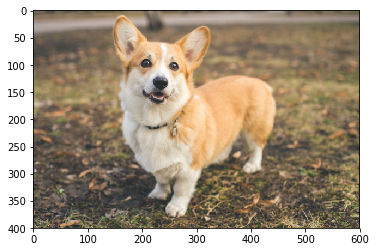

C:\ProgramData\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


A dog is detected in the file additional_test_images\image_1.jpg, and its predicted breed is Cardigan welsh corgi.


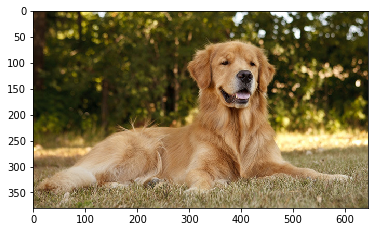

A dog is detected in the file additional_test_images\image_2.jpg, and its predicted breed is Nova scotia duck tolling retriever.


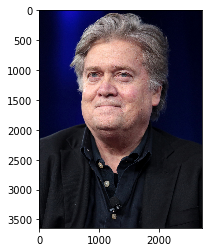

A human face is detected in the file additional_test_images\image_3.jpg, and it resembles a dog of breed Lowchen.


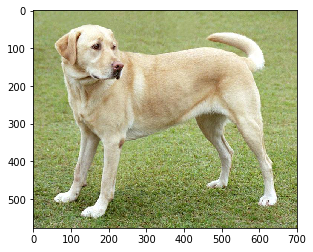

A dog is detected in the file additional_test_images\image_4.jpg, and its predicted breed is Anatolian shepherd dog.


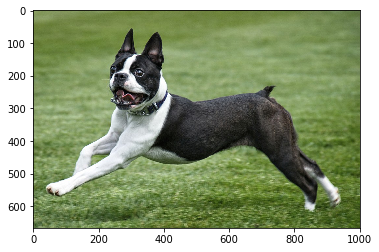

A dog is detected in the file additional_test_images\image_5.jpg, and its predicted breed is Boston terrier.


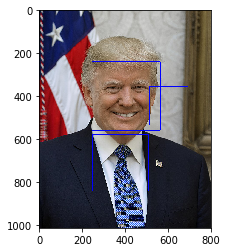

A human face is detected in the file additional_test_images\image_6.jpg, and it resembles a dog of breed Norfolk terrier.


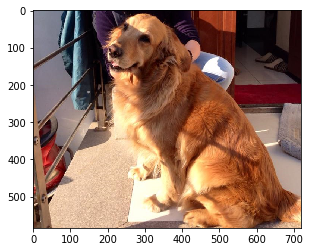

A dog is detected in the file additional_test_images\image_7.jpg, and its predicted breed is Golden retriever.


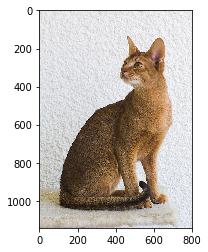

Error: Neither dog nor human is detected in the file additional_test_images\image_8.jpg


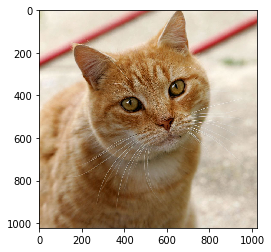

Error: Neither dog nor human is detected in the file additional_test_images\image_9.jpg


In [35]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

additional_files = np.array(glob("additional_test_images/*"))

## suggested code, below
for file in additional_files:
    run_app(file)